In [13]:
import gym
import numpy as np
import time
from uofgsocsai import LochLomondEnv # load the class defining the custom Open AI Gym problem
import os, sys
from helpers import *
import matplotlib.pyplot as plt
from more_itertools import chunked
print("Working dir:"+os.getcwd())
print("Python version:"+sys.version)

Working dir:/Users/deadfish/Desktop/MSc DataAnalytics/AI/Assessment/source
Python version:3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [14]:

# Setup the parameters for the specific problem (you can change all of these if you want to) 
problem_id = 7       # problem_id \in [0:7] generates 8 diffrent problems on which you can train/fine-tune your agent 
reward_hole = 0     # should be less than or equal to 0.0 (you can fine tune this  depending on you RL agent choice)
is_stochastic = True  # should be False for A-star (deterministic search) and True for the RL agent

max_episodes = 2000  # you can decide you rerun the problem many times thus generating many episodes... you can learn from them all!
max_iter_per_episode = 99 # you decide how many iterations/actions can be executed per episode


In [15]:
#Generate the specific problem 
env = LochLomondEnv(problem_id=problem_id, is_stochastic=False,   reward_hole=reward_hole)

In [16]:
# Let's visualize the problem/env
print(env.desc)

[[b'H' b'F' b'F' b'F' b'F' b'H' b'F' b'S']
 [b'F' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'H' b'H' b'F' b'F' b'F' b'H' b'F']
 [b'F' b'H' b'F' b'F' b'H' b'F' b'H' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'G']]


In [17]:
# Create a representation of the state space for use with AIMA A-star
state_space_locations, state_space_actions, state_initial_id, state_goal_id = env2statespace(env)

In [18]:
# Reset the random generator to a known state (for reproducability)
np.random.seed(10)

In [19]:
episode_rewards = []
episode_step = []
fail_times=0
success_times=0

for e in range(max_episodes): # iterate over episodes
    rewards_current_episode = 0 #initial the rewards current episode
    observation = env.reset() # reset the state of the env to the starting state     
    
    for iter in range(max_iter_per_episode):
      #env.render() # for debugging/develeopment you may want to visualize the individual steps by uncommenting this line      
      action = env.action_space.sample() # your agent goes here (the current agent takes random actions)
      observation, reward, done, info = env.step(action) # observe what happends when you take the action
      
      # TODO: You'll need to add code here to collect the rewards for plotting/reporting in a suitable manner
      rewards_current_episode += reward
    
      #print("e,iter,reward,done =" + str(e) + " " + str(iter)+ " " + str(reward)+ " " + str(done))

      # Check if we are done and monitor rewards etc...
      if(done and reward==reward_hole): 
          #env.render()     
          #print("We have reached a hole :-( [we can't move so stop trying; just give up]")
          fail_times += 1
          break
         
      if (done and reward == +1.0):
          #env.render()     
          #print("We have reached the goal :-) [stop trying to move; we can't]. That's ok we have achived the goal]")
          success_times += 1
          break       
    episode_rewards.append(rewards_current_episode)
    episode_step.append(iter)
score =  sum(episode_rewards)/max_episodes  
print("Score over time: " +  str(score))

average_rewards =[sum(x) / len(x) for x in chunked(episode_rewards, 100)]
print("********Average rewards per 100 episodes********\n")
print(average_rewards)

print(success_times)
print(fail_times)

Score over time: 0.0105
********Average rewards per 100 episodes********

[0.02, 0.01, 0.01, 0.0, 0.03, 0.02, 0.01, 0.02, 0.0, 0.02, 0.0, 0.02, 0.01, 0.0, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0]
21
1979


In [8]:
filename = "random_out"
content ="\n Problem_"+str(problem_id)+"    Number of Success: "+str(success_times)+"   Score: "+str(score)
with open(filename+".txt", "a") as f:
   f.write(str(content))

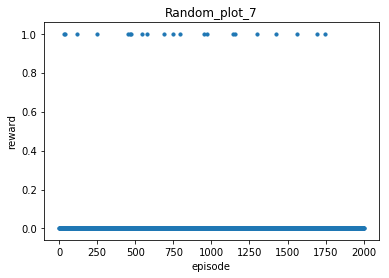

In [21]:
x = np.arange(1,max_episodes+1,1)
y = episode_rewards
imgname = "Random_plot_"+str(problem_id)
ax = plt.gca()

ax.set_xlabel('episode')
ax.set_ylabel('reward')
plt.title(imgname)
ax.scatter(x, y, s=10)

plt.savefig(imgname)
plt.show()
